# Data Augmentation
작성일:[2019-10-20]
작성자:Paul Kim

## 목표 
- Inc angle을 입력에 추가하여 성능을 측정해 본다.
- Inc_angle의 결측치는 is_nan 노트북에서 해결하였다.



### 1. Library Load

In [1]:
#%% 
import sys 
sys.path.append("C:/Users/win10/Workspace/kaggle.gongdeok/iceberg_week1/paul_temp")

import numpy as np

import pandas as pd

from scipy import signal
from random import sample
from iceberg_data import load_data, to_numpy
import models

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('ggplot')


###  2. Define Helper function 


In [2]:
def preprocessing(batch_x):

    normalize  = lambda x : (x+50)/ (40+50)

    preprocess = lambda x :  np.transpose(np.array([
            normalize(x[:,:,0]), 
            normalize(x[:,:,1])]), [1,2,0])   

    return np.array([ preprocess(x) for x in batch_x])


def train_gen(X, Y, batch_size= 32, epochs=200):

    for _ in range(epochs*2):
        datagen = ImageDataGenerator(
                horizontal_flip = True, 
                vertical_flip   = True, 
                rotation_range  = 15,
                fill_mode       = 'nearest')

        datagen.fit(X)

        for x, y in datagen.flow(X, Y, batch_size=32):

            x = preprocessing(x)

            yield x, y 

def valid_gen(X, Y, batch_size= 32, epochs=200):

    for _ in range(epochs*2):
        for i in range(len(X)//batch_size):

            x = X[i*batch_size:(i+1)*batch_size]
            x = preprocessing(x)
            y = Y[i*batch_size:(i+1)*batch_size]

            yield x, y 

### 3. Data load & Split train valid set 

In [9]:
data = load_data()
X1, X2, Y = to_numpy(data, with_angle=True)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.25)

### 4. Model build & training

In [7]:
from tensorflow.keras.optimizers import Adam
from tensorflow.python.ops.losses.losses_impl import log_loss

"Model Training"
check_pointer = ModelCheckpoint(
    filepath='./models/simple_conv_net_aug2.h5',
    monitor='val_log_loss',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    
    
    save_freq='epoch',)

model = models.SimpleConvNet()
model.build((32,75,75,2))
model.compile(
    optimizer=Adam(lr=10e-4),
    loss='binary_crossentropy',
    metrics=[log_loss],
)

model.summary()
#%% 
epochs = 500
history = model.fit_generator(
    generator        = train_gen(X_train, y_train, batch_size=32, epochs=epochs),
    steps_per_epoch  = len(X_train) // 32, 
    validation_data  = valid_gen(
        X_valid, y_valid, batch_size=32, epochs=epochs),
    validation_steps = len(X_valid)//32, 
    epochs=epochs, 
    callbacks=[check_pointer])

Model: "simple_conv_net_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    multiple                  1216      
_________________________________________________________________
sequential_7 (Sequential)    multiple                  73856     
_________________________________________________________________
sequential_8 (Sequential)    multiple                  147584    
_________________________________________________________________
sequential_9 (Sequential)    multiple                  73792     
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
sequential_10 (Sequential)   multiple                  131584    
_________________________________________________________________
sequential_11 (Sequential)   multiple            

c:\users\win10\envs\tf2.0\lib\site-packages\keras_preprocessing\image\image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (1203, 75, 75, 2) (2 channels).
  ' channels).')
c:\users\win10\envs\tf2.0\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1203, 75, 75, 2) (2 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


37/37 [==============================] - 2s 50ms/step - loss: 0.6943 - log_loss: 0.6965 - val_loss: 0.6903 - val_log_loss: 0.6903
Epoch 2/500
37/37 [==============================] - 2s 44ms/step - loss: 0.6926 - log_loss: 0.6967 - val_loss: 0.6897 - val_log_loss: 0.6897
Epoch 3/500
37/37 [==============================] - 1s 35ms/step - loss: 0.6869 - log_loss: 0.6850 - val_loss: 0.6927 - val_log_loss: 0.6927
Epoch 4/500
37/37 [==============================] - 1s 37ms/step - loss: 0.6861 - log_loss: 0.6852 - val_loss: 0.6809 - val_log_loss: 0.6809
Epoch 5/500
37/37 [==============================] - 1s 36ms/step - loss: 0.6586 - log_loss: 0.6680 - val_loss: 0.6084 - val_log_loss: 0.6084
Epoch 6/500
37/37 [==============================] - 1s 37ms/step - loss: 0.5708 - log_loss: 0.5876 - val_loss: 0.5329 - val_log_loss: 0.5329
Epoch 7/500
37/37 [==============================] - 1s 37ms/step - loss: 0.5215 - log_loss: 0.5187 - val_loss: 0.5101 - val_log_loss: 0.5101
Epoch 8/500
37/37 

37/37 [==============================] - 1s 35ms/step - loss: 0.2581 - log_loss: 0.2286 - val_loss: 0.2825 - val_log_loss: 0.2825
Epoch 116/500
37/37 [==============================] - 1s 35ms/step - loss: 0.2752 - log_loss: 0.3239 - val_loss: 0.2753 - val_log_loss: 0.2753
Epoch 117/500
37/37 [==============================] - 1s 35ms/step - loss: 0.2612 - log_loss: 0.2695 - val_loss: 0.2814 - val_log_loss: 0.2814
Epoch 118/500
37/37 [==============================] - 1s 36ms/step - loss: 0.2766 - log_loss: 0.2690 - val_loss: 0.3625 - val_log_loss: 0.3625
Epoch 119/500
37/37 [==============================] - 1s 34ms/step - loss: 0.2482 - log_loss: 0.2568 - val_loss: 0.2873 - val_log_loss: 0.2873
Epoch 120/500
37/37 [==============================] - 1s 34ms/step - loss: 0.2682 - log_loss: 0.2522 - val_loss: 0.2807 - val_log_loss: 0.2807
Epoch 121/500
37/37 [==============================] - 1s 35ms/step - loss: 0.3086 - log_loss: 0.3039 - val_loss: 0.2773 - val_log_loss: 0.2773
Epoch 

Epoch 172/500
37/37 [==============================] - 1s 35ms/step - loss: 0.2325 - log_loss: 0.2255 - val_loss: 0.2746 - val_log_loss: 0.2746
Epoch 173/500
37/37 [==============================] - 1s 35ms/step - loss: 0.2342 - log_loss: 0.2177 - val_loss: 0.2746 - val_log_loss: 0.2746
Epoch 174/500
37/37 [==============================] - 1s 35ms/step - loss: 0.2509 - log_loss: 0.2379 - val_loss: 0.3006 - val_log_loss: 0.3006
Epoch 175/500
37/37 [==============================] - 1s 36ms/step - loss: 0.2602 - log_loss: 0.2921 - val_loss: 0.3280 - val_log_loss: 0.3280
Epoch 176/500
37/37 [==============================] - 1s 35ms/step - loss: 0.2413 - log_loss: 0.2709 - val_loss: 0.2655 - val_log_loss: 0.2655
Epoch 177/500
37/37 [==============================] - 1s 35ms/step - loss: 0.2235 - log_loss: 0.2272 - val_loss: 0.2779 - val_log_loss: 0.2779
Epoch 178/500
37/37 [==============================] - 1s 35ms/step - loss: 0.2307 - log_loss: 0.2553 - val_loss: 0.3873 - val_log_loss:

Epoch 229/500
37/37 [==============================] - 1s 35ms/step - loss: 0.2152 - log_loss: 0.2055 - val_loss: 0.2770 - val_log_loss: 0.2770
Epoch 230/500
37/37 [==============================] - 1s 35ms/step - loss: 0.2415 - log_loss: 0.2252 - val_loss: 0.2701 - val_log_loss: 0.2701
Epoch 231/500
37/37 [==============================] - 1s 35ms/step - loss: 0.2259 - log_loss: 0.2443 - val_loss: 0.3352 - val_log_loss: 0.3352
Epoch 232/500
37/37 [==============================] - 1s 35ms/step - loss: 0.2408 - log_loss: 0.2404 - val_loss: 0.2758 - val_log_loss: 0.2758
Epoch 233/500
37/37 [==============================] - 1s 35ms/step - loss: 0.2118 - log_loss: 0.1804 - val_loss: 0.2885 - val_log_loss: 0.2885
Epoch 234/500
37/37 [==============================] - 1s 35ms/step - loss: 0.2073 - log_loss: 0.2206 - val_loss: 0.2777 - val_log_loss: 0.2777
Epoch 235/500
37/37 [==============================] - 1s 35ms/step - loss: 0.2235 - log_loss: 0.2275 - val_loss: 0.2811 - val_log_loss:

Epoch 286/500
37/37 [==============================] - 1s 34ms/step - loss: 0.1980 - log_loss: 0.2050 - val_loss: 0.3313 - val_log_loss: 0.3313
Epoch 287/500
37/37 [==============================] - 1s 35ms/step - loss: 0.2149 - log_loss: 0.2355 - val_loss: 0.3295 - val_log_loss: 0.3295
Epoch 288/500
37/37 [==============================] - 1s 38ms/step - loss: 0.2221 - log_loss: 0.2420 - val_loss: 0.3069 - val_log_loss: 0.3069
Epoch 289/500
37/37 [==============================] - 1s 39ms/step - loss: 0.2073 - log_loss: 0.2112 - val_loss: 0.2823 - val_log_loss: 0.2823
Epoch 290/500
37/37 [==============================] - 2s 49ms/step - loss: 0.1838 - log_loss: 0.1980 - val_loss: 0.2812 - val_log_loss: 0.2812
Epoch 291/500
37/37 [==============================] - 2s 43ms/step - loss: 0.1835 - log_loss: 0.1899 - val_loss: 0.2903 - val_log_loss: 0.2903
Epoch 292/500
37/37 [==============================] - 1s 39ms/step - loss: 0.2052 - log_loss: 0.2002 - val_loss: 0.3170 - val_log_loss:

Epoch 343/500
37/37 [==============================] - 1s 35ms/step - loss: 0.1886 - log_loss: 0.1890 - val_loss: 0.2962 - val_log_loss: 0.2962
Epoch 344/500
37/37 [==============================] - 1s 34ms/step - loss: 0.1845 - log_loss: 0.1674 - val_loss: 0.3171 - val_log_loss: 0.3171
Epoch 345/500
37/37 [==============================] - 1s 35ms/step - loss: 0.1812 - log_loss: 0.1513 - val_loss: 0.2894 - val_log_loss: 0.2894
Epoch 346/500
37/37 [==============================] - 1s 34ms/step - loss: 0.1919 - log_loss: 0.1785 - val_loss: 0.2836 - val_log_loss: 0.2836
Epoch 347/500
37/37 [==============================] - 1s 36ms/step - loss: 0.2106 - log_loss: 0.2221 - val_loss: 0.2953 - val_log_loss: 0.2953
Epoch 348/500
37/37 [==============================] - 1s 35ms/step - loss: 0.1845 - log_loss: 0.1671 - val_loss: 0.2923 - val_log_loss: 0.2923
Epoch 349/500
37/37 [==============================] - 1s 36ms/step - loss: 0.1901 - log_loss: 0.1842 - val_loss: 0.3021 - val_log_loss:

Epoch 400/500
37/37 [==============================] - 1s 34ms/step - loss: 0.2054 - log_loss: 0.1884 - val_loss: 0.2560 - val_log_loss: 0.2560
Epoch 401/500
37/37 [==============================] - 1s 34ms/step - loss: 0.1920 - log_loss: 0.1977 - val_loss: 0.3240 - val_log_loss: 0.3240
Epoch 402/500
37/37 [==============================] - 1s 35ms/step - loss: 0.1970 - log_loss: 0.2046 - val_loss: 0.3019 - val_log_loss: 0.3019
Epoch 403/500
37/37 [==============================] - 1s 34ms/step - loss: 0.1787 - log_loss: 0.1765 - val_loss: 0.2967 - val_log_loss: 0.2967
Epoch 404/500
37/37 [==============================] - 1s 34ms/step - loss: 0.1712 - log_loss: 0.1672 - val_loss: 0.2809 - val_log_loss: 0.2809
Epoch 405/500
37/37 [==============================] - 1s 34ms/step - loss: 0.1973 - log_loss: 0.2075 - val_loss: 0.2895 - val_log_loss: 0.2895
Epoch 406/500
37/37 [==============================] - 1s 35ms/step - loss: 0.1727 - log_loss: 0.1688 - val_loss: 0.2801 - val_log_loss:

Epoch 457/500
37/37 [==============================] - 1s 34ms/step - loss: 0.1622 - log_loss: 0.1417 - val_loss: 0.3344 - val_log_loss: 0.3344
Epoch 458/500
37/37 [==============================] - 1s 35ms/step - loss: 0.1976 - log_loss: 0.2276 - val_loss: 0.2930 - val_log_loss: 0.2930
Epoch 459/500
37/37 [==============================] - 1s 34ms/step - loss: 0.1657 - log_loss: 0.1655 - val_loss: 0.3777 - val_log_loss: 0.3777
Epoch 460/500
37/37 [==============================] - 1s 34ms/step - loss: 0.2151 - log_loss: 0.2032 - val_loss: 0.3209 - val_log_loss: 0.3209
Epoch 461/500
37/37 [==============================] - 1s 34ms/step - loss: 0.1844 - log_loss: 0.1801 - val_loss: 0.2715 - val_log_loss: 0.2715
Epoch 462/500
37/37 [==============================] - 1s 35ms/step - loss: 0.1554 - log_loss: 0.1545 - val_loss: 0.2845 - val_log_loss: 0.2845
Epoch 463/500
37/37 [==============================] - 1s 35ms/step - loss: 0.1982 - log_loss: 0.2121 - val_loss: 0.2860 - val_log_loss:

### 5. plot results(history)

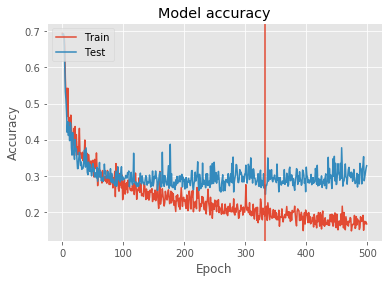

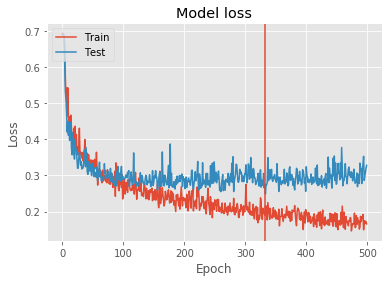

In [8]:
best_epoch = history.history['val_log_loss'].index(
    np.min((history.history['val_log_loss'])))
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axvline(x=best_epoch)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['log_loss'])
plt.plot(history.history['val_log_loss'])
plt.axvline(x=best_epoch)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### 6. evaluate model

In [22]:
def preprocessing_old(batch_x):

    normalize  = lambda x : (x+50)/ (40+50)

    preprocess = lambda x :  np.transpose(np.array([
            normalize(x[:,:,0]), 
            normalize(x[:,:,1])]), [1,2,0])   

    return np.array([ preprocess(x) for x in batch_x])

In [12]:
import tensorflow as tf 
val_dataset = tf.data.Dataset.from_tensor_slices((preprocessing(X_valid), y_valid)).batch(401)
model.load_weights('./models/simple_conv_net.h5')
res_loss, res_log_loss = model.evaluate(val_dataset)
print(f"기존 Dataset")
print(f"Loss     : {res_loss:0.5f}\nLog loss : {res_log_loss:0.5f}")

val_dataset = tf.data.Dataset.from_tensor_slices((preprocessing(X_valid), y_valid)).batch(401)
model.load_weights('./models/simple_conv_net_aug2.h5')
res_loss, res_log_loss = model.evaluate(val_dataset)
print(f"신규 Dataset")
print(f"Loss     : {res_loss:0.5f}\nLog loss : {res_log_loss:0.5f}")

1/1 [==============================] - 0s 43ms/step - loss: 0.1297 - log_loss: 0.1297
기존 Dataset
Loss     : 0.12972
Log loss : 0.12972
1/1 [==============================] - 0s 44ms/step - loss: 0.2459 - log_loss: 0.2459
신규 Dataset
Loss     : 0.24593
Log loss : 0.24593


### 7. Generate submission file

In [ ]:
path_test = "C:/Users/win10/Workspace/kaggle.dataset/statoil-iceberg-classifier-challenge/test.json"
test = pd.read_json(path_test)
test['inc_angle'] = pd.to_numeric(test['inc_angle'],errors='coerce')

"Raw data to numpy"
band_1 = test['band_1'].apply(lambda x: np.reshape(x, newshape=(75,75)))
band_2 = test['band_2'].apply(lambda x: np.reshape(x, newshape=(75,75)))

test_X = np.array([
    np.transpose(np.array([b1,b2]),[1,2,0]) 
    for b1, b2 in zip(band_1, band_2)], dtype=np.float32)

test_X = preprocessing(test_X)

In [ ]:
"Build Dataset"
dataset = tf.data.Dataset.from_tensor_slices(test_X).batch(32)
"Model inferencing & save results "
pred_y = model.predict(dataset)
test['is_iceberg'] = pred_y
test[['id','is_iceberg']].to_csv('./submissions/simple_conv_net_aug.csv', index=False)

### 7. Conclusion
기존 Augmentation 했던 내용보다 더 loss가 큰것으로 보아 Augmentation 방법이 좋지 않을 수 있다는 생각이 들었다. 그런데 실제 Submission 진행 후 확인된 내용은 0.206으로 보다 높은 스코어를 내 주었다. 아무래도 측정하고있는 Metric function의 Log_loss와 Kaggle에서의 log_loss에 차이가 있는듯 하다. 

![submission](./images/submission_20191020.PNG)